## Analysis of California’s EV Charging Stations Infrastructure

## Executive Summary

As the State of California moves towards its goal to make its transportation green, emission-free, and clean and move away from fossil fuel dependencies by 2035<sup>1</sup>. It is essential to investigate its EV infrastructure challenges to support this ambitious plan. While California is expanding on its EV charging infrastructure but there is growing surge of EV registrations and it could potentially put strains on the existing EV infrastructure readiness across different regions especially where infrastructure is underdeveloped. We have analyzed the gaps in the existing EV Charger infrastructure, identified business opportunities to fill shortfalls in the infrastructure, forecast future demands of EVs and EVs charging network to accurately assess whether California can accommodate with the rising demands on its EV infrastructure. Delving into the identification of gaps on the EV Charging has led us to uncover that there are several areas which have substantial load on its EV Charging network because of large number of EVs being registered and some areas lack in appropriate infrastructure which remains a concern as these areas are unable to meet rising demands, there are business opportunities which could help fulfill the current gaps in the EV infrastructure, additionally by forecasting the future EVs and EV Charging network we further provide insights into  whether the State of California is ready to address shortages in infrastructure and to come to grips with the risings demands on its EV infrastructure and move steadily towards achieving its 2035 goals with confidence. Since, the State of California is expected to receive funding <sup>2</sup> for EV Charging projects and for building out infrastructure for EV Charging, we suggest that California divert the funding to areas where EV establishments are lacking, and expedite installation of EV to cope up with the rising demand to ensure emission-free transportations by 2035.

# Project Proposal and Data Source

This project is about finding the gaps in the EV Charging infrastructure in California by comparing its distribution with regional EV registrations as well as the overall population of the region. It provides an overview of the EV charging industry by diving into the nuances of the EV Charging sector and identifies potential opportunities for installing new chargers in areas deemed inadequately fulfilled. It also delves into demand forecasts for future EV sales to help businesses anticipate market trends.

Data used for this project consists of EV Charger Data from US Department of Transportation, and it highlights both private and public chargers as well as the nuances within them. We used California's population data as per zip codes taken from United States Census Bureau, California Vehicle Fuel type data according to zip code taken from the US General Services Administration's Technology Transformation Services, and location coordinates for California according to the zip code taken from US Postal Service for this project.


## Introduction and Motivation

California recently surpassed 150,000 public and private chargers installed statewide, California is dedicated to zero-emission vehicle infrastructure and wants to expedite the transition to have all new cars and vehicles sold be zero-emission vehicles by 2035. California is expected to receive more than USD 380 million dollars from from President Biden’s Infrastructure Investment and Jobs Act for building out chargers. Additionally, they will also receive more than $1 billion in funding for EV charging and hydrogen refueling projects for cars, trucks, and buses. The projects range from deploying chargers in underserved communities to rapid expansion along the state's busiest corridors<sup>1</sup>. Furthermore, according to a  report by PwC, Charge Point Operators (CPOs), which build, operate and maintain EV charging stations, account for 50% of the revenue of the EV Supply Equipment industry. This industry is worth USD 16-19 billion at present in terms of revenue and it's projected to reach around USD 100 billion by 2040 in the US alone, it is imperative to build charging stations which are profitable at present while also being a sound investment for the future to achieve clean transportation goals set by State of California and on top of that with rising EV registrations and increase in demand for EV Chargers Stations and network, the need for a robust EV charging network is becoming increasingly critical. Hence, it is becoming paramount that an assessment be made that whether or not California is EV infrastructure-ready to accommodate the rise in EVs, and handle additional pressure of upsurge in demand of EV charging stations.

Our motivation is to analyse and identify the deficiencies in EV infrastructure, additionally, ascertain potential business opportunities arising due to inadequacies in EV infrastructure, and determine the future forecasts of EVs to anticipate demand of EV Charging infrastructure and assess readiness of State of California to address rising needs of its EV dependent population.


## Summarized Exploratory Data Analysis

1.

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, RangeSlider, LabelSet
from bokeh.layouts import layout, column, row, Spacer
from bokeh.io import output_notebook
from matplotlib import rcParams
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from bokeh.models import Label


### Cleanup of the EV Charger dataset

In this cleanup, we are first reading the excel and filtering for only relevant columns and values (electic as we are doing the analysis for the electric vehicles only).

There are some missing values in the dataset for the city and zip code for chargers at UC San Diego. We have imputed the data with the city and the zip code for UC San Diego by manually checking the same.

Then we have done some type correction for the zip code.

In [2]:
# Loading the dataset for the charger
chargers = pd.read_excel('Alternative_Fueling_Stations_6106984391392853645.xlsx')

#Filtering for only relevant columns
cols = ['fuel_type_code', 'city', 'state', 'latitude', 'longitude', 'station_name', 'zip', 'groups_with_access_code', 'open_date']
chargers = chargers[cols]

#Filtering for electic chargers in california
cali_ev_chargers = chargers[(chargers['fuel_type_code'] == 'ELEC') & (chargers['state'] == 'CA')]

#Checking for missing values
#Missing for UCSD chargers are missing city and zip code
cali_ev_chargers[cali_ev_chargers['city'].isna() | cali_ev_chargers['zip'].isna()]

#imputing with UCSD Zip Code and City : La Jolla | Find zip code using longitude and latitude
cali_ev_chargers['city'] = cali_ev_chargers['city'].fillna("La Jolla")
cali_ev_chargers['zip'] = cali_ev_chargers['zip'].fillna(92093)

# Zip Code 92555
cali_ev_chargers['zip'] = cali_ev_chargers['zip'].apply(lambda x : '92555' if x == 'CA' else x)

cali_ev_chargers['zip'] = cali_ev_chargers['zip'].apply(lambda x : int(x))

# Drop rows where 'open_date' is NaN
cali_ev_chargers = cali_ev_chargers.dropna(subset=['open_date'])

### Cleaning Vehicle Registration Data

In this, we are loading the dataset and filtering for only electric vehicles. Furthermore, we are correcting the type for the zip code and year, making sure there are no extraneous zip codes (filtering for zip codes in California).  We are also removing the missing model year vehicles and selected the relevant columns for our analysis. There are no null values in the data, after the cleanup.

In [3]:
## Vehicle Registration
ev = pd.read_csv('vehicle-fuel-type-count-by-zip-code-20231.csv')

#Filtering for electric vehicles
ev_cali = ev[ev['Fuel'] == 'Battery Electric']

#Converting Zip codes to numeric
ev_cali['ZIP Code'] = pd.to_numeric(ev_cali['ZIP Code'], errors='coerce')

#Filtering for zip code ranges to have zip codes that are only in California
ev_cali = ev_cali[(ev_cali['ZIP Code'] >= 90001) & (ev_cali['ZIP Code'] <= 96162)]

# Replace invalid year values with NaN
ev_cali['Model Year'] = ev_cali['Model Year'].replace(r'<\d{4}', np.nan, regex=True)

# Removing the nan values
ev_cali = ev_cali[~ev_cali['Model Year'].isna()]

# Convert the remaining valid years to datetime
ev_cali['Model Year'] = pd.to_datetime(ev_cali['Model Year'], format='%Y')

ev_cali['Model Year'] = ev_cali['Model Year'].dt.year

#Further Cleanup
ev_cali = ev_cali[~ev_cali['ZIP Code'].isna()]
ev_cali.columns = ['date', 'zip', 'model_year', 'fuel', 'make', 'duty', 'vehicles']
ev_cali.drop(columns=['date'], inplace=True)


In [4]:
# Loading the file
population = pd.read_excel('California_DemographicsByZipCode_sample.xlsx', skiprows = 4)

#Filtering for only relevant columns
cols = ['name', 'population']
cali_pop = population[cols]
cali_pop.columns = ['zip', 'population']
cali_pop = cali_pop.loc[1:]
cali_pop['zip'] = cali_pop['zip'].astype(int)

#checking for nan values
cali_pop.isna().sum()

,0
zip,0
population,0


In [5]:
#Loading zip code latitude longitude dataset
zip_code_db = pd.read_csv('zip_code_database.csv')
zip_codes = zip_code_db[['zip', 'latitude', 'longitude']]

#Merging with various datasets
cali_pop = cali_pop.merge(zip_codes, left_on='zip', right_on='zip', how='inner')
ev_cali = ev_cali.merge(zip_codes, left_on='zip', right_on='zip', how = 'inner')

## Merging dataframes into 1 and adding latitude and longitude
grouped_ev_chargers = cali_ev_chargers.groupby('zip')[['station_name']].count()
grouped_evs = ev_cali.groupby('zip')[['vehicles']].sum()

# Merging dataframes
merged_evs_veh_stations = grouped_evs.merge(grouped_ev_chargers, left_index=True, right_index=True, how='inner').reset_index()

#adding population as well
cali_pop_veh_stations = merged_evs_veh_stations.merge(cali_pop[['zip', 'population']], left_on='zip', right_on='zip', how = 'left')

#adding latitude and longitude
cali_pop_veh_stations = cali_pop_veh_stations.merge(zip_codes, left_on='zip', right_on='zip', how = 'left')

#Merging and imputing with median population data
cali_pop_veh_stations.fillna(cali_pop_veh_stations['population'].median(), inplace=True)

### Zip Code Areas

A dataset with the areas of the zip codes. This is filtered to include only relevant columns and there are no null values in the same.

In [6]:
#Adding a dataframe with zip code areas
zip_area = pd.read_csv('/content/ZipCodes_4635718228080594110.csv')
zip_area = zip_area[['Zip Code','SqMile']]
zip_area.columns = ['zip', 'sqMile']


In [7]:
zip_area.isna().sum()

,0
zip,0
sqMile,0


In [8]:
#Checking the demographic of the data
ev_cali.describe()

,zip,model_year,vehicles,latitude,longitude
count,31872.000000,31872.000000,31872.000000,31872.000000,31872.000000
mean,93201.392162,2019.051958,34.690889,35.729240,-119.689863
std,1765.181377,3.634039,83.936995,2.149311,2.076368
min,90001.000000,2010.000000,1.000000,32.550000,-124.260000
25%,91913.000000,2016.000000,5.000000,33.920000,-121.900000
50%,93065.000000,2020.000000,14.000000,34.460000,-118.870000
75%,94803.250000,2022.000000,28.000000,37.740000,-117.910000
max,96162.000000,2024.000000,3368.000000,41.930000,-114.330000


In [9]:
#Checking after cleanup
cali_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zip         1803 non-null   int64  
 1   population  1803 non-null   int64  
 2   latitude    1803 non-null   float64
 3   longitude   1803 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 56.5 KB


In [10]:
# Checking demographics of dataset
cali_pop.describe()

,zip,population,latitude,longitude
count,1803.000000,1803.000000,1803.000000,1803.000000
mean,93659.829728,21827.601220,36.414082,-119.914642
std,1811.731736,22457.188722,2.433280,2.136219
min,90001.000000,0.000000,32.550000,-124.260000
25%,92257.500000,1386.500000,34.060000,-121.850000
50%,93653.000000,15126.000000,36.720000,-120.070000
75%,95379.500000,36501.500000,38.330000,-118.080000
max,97635.000000,106042.000000,41.930000,-114.180000


In [11]:
#Checking after cleanup
cali_ev_chargers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18504 entries, 133 to 87740
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fuel_type_code           18504 non-null  object        
 1   city                     18504 non-null  object        
 2   state                    18504 non-null  object        
 3   latitude                 18504 non-null  float64       
 4   longitude                18504 non-null  float64       
 5   station_name             18504 non-null  object        
 6   zip                      18504 non-null  int64         
 7   groups_with_access_code  18504 non-null  object        
 8   open_date                18504 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [12]:
#Number of vehicles by year
ev_cali.groupby('model_year')[['vehicles']].sum()

,vehicles
model_year,
2010,146
2011,2563
2012,3502
2013,11496
2014,10863
2015,14735
2016,22881
2017,28985
2018,83225


In [13]:
#max zip codes by number of stations
cali_pop_veh_stations[['zip', 'station_name']].sort_values(by = 'station_name', ascending = False)

,zip,station_name
738,94025.0,373
932,95054.0,311
474,92618.0,302
336,92101.0,178
516,92802.0,161
...,...,...
1114,95660.0,1
1031,95402.0,1
1116,95662.0,1
1117,95666.0,1


### Cleaning Section Summary

We have used 5 datasets for our analysis. There are 3 primary datasets which are being used for the analysis and 2 secondary data sets. The three primary datasets give us information about the California population, Charging stations in California, and the EV registrations in California. These datasets had missing values which have imputed or removed according to the type of nulls. There are no nulls in the datasets and they are clean and ready for further exploratory data analysis

## Section 1: EDA

Geospatial distribution of Public and Non-Public EV Chargers according to their zip codes. Here, non-public category consists of private, government, and other chargers unavailable to the common public.

<b> What is the current distribution of public and non-public chargers in California ? <b>

In [14]:
cali_ev_chargers['groups_with_access_code'].apply(lambda x : "Public" if 'public' in str(x).lower() else 'Non Public').reset_index()
cali_ev_chargers['access_categorization'] = cali_ev_chargers['groups_with_access_code'].apply(lambda x : "Public" if 'public' in str(x).lower() else 'Non Public')
pub_access = cali_ev_chargers[cali_ev_chargers['access_categorization'] == 'Public']
priv_access = cali_ev_chargers[cali_ev_chargers['access_categorization'] == 'Non Public']
fig = px.scatter_mapbox(
    pub_access,
    lat='latitude',
    lon='longitude',
    opacity=0.5,
    color_discrete_sequence=[px.colors.sequential.Viridis[7]],
    mapbox_style='open-street-map',
    center={'lat': 37.75, 'lon': -122.4},
    zoom=5
)
fig.data[0].name = 'Public'
fig.data[0].showlegend = True

#Adding trace for other scatterplots
fig.add_trace(
    go.Scattermapbox(
        lat=priv_access['latitude'],
        lon=priv_access['longitude'],
        mode='markers',
        opacity=0.31,
        marker=dict(color='orange'),
        name='Non Public',
        showlegend=True
    )
)

# Customizing the layout
fig.update_layout(
    title={
        'text': 'Geospatial Analysis of Public and Non Public Charging Stations',
        'font': {'size': 18, 'family': 'Arial', 'color': 'black'},
        'x': 0.5,
        'y': 0.95
    },
    mapbox_zoom=4.6,
    mapbox_style='open-street-map',
    margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()

We can see that both are generally clustered around the major cities. We are seeing a greater concentration around metropolitan hubs like Los Angeles, Bay Area, San Diego etc. Furthermore, we are noticing public charger connectivity towards the interior parts of the state as well.


<b>Now lets dive down to look at the distribution of the chargers across various access types <b>
This also consists of temporarily unavailable or planned chargers.

In [15]:
df_private = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Private']
df_public = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Public']
df_private_gov = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Private - Government only']
df_public_call_ahead = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Public - Call ahead']
df_temp_unavailable_pub = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'TEMPORARILY UNAVAILABLE (Public)']
df_temp_unavailable_pub_credit = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Public - Credit card at all times']
df_pub_limited_hours = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Public - Limited hours']
df_temp_unavailable_private = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'TEMPORARILY UNAVAILABLE (Private)']
df_pub_card = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Public - Card key at all times']
df_temp_unavailable_pub_call = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'TEMPORARILY UNAVAILABLE (Public - Call ahead)']
df_private_fleet = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Private - Fleet customers only']
df_private_credit = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'Private - Credit card at all times']
df_planned_not_pub_credit = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'PLANNED - not yet accessible (Public - Credit card at all times)']
df_planned_pub = cali_ev_chargers[cali_ev_chargers['groups_with_access_code'] == 'PLANNED - not yet accessible (Public)']

# Create base scatter mapbox for Public
fig = px.scatter_mapbox(
   df_public,
    lat='latitude',
    lon='longitude',
    opacity=0.7,
    color_discrete_sequence=[px.colors.sequential.Viridis[6]],
    mapbox_style='open-street-map',
    center={'lat': 37.75, 'lon': -122.4},
    zoom=6
)
fig.data[0].name ='Private'
fig.data[0].showlegend = True

# Adding trace for Public
fig.add_trace(
    go.Scattermapbox(
        lat=df_public['latitude'],
        lon=df_public['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='orange'),
        name='Public',
        showlegend=True
    )
)

# Adding trace for Private - Government
fig.add_trace(
    go.Scattermapbox(
        lat=df_private_gov['latitude'],
        lon=df_private_gov['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='green'),
        name='Private Government',
        showlegend=True
    )
)

# Adding trace for Public Call Ahead
fig.add_trace(
    go.Scattermapbox(
        lat=df_public_call_ahead['latitude'],
        lon=df_public_call_ahead['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='blue'),
        name='Public Call Ahead',
        showlegend=True
    )
)

# Adding trace for Temporarily Unavailable (Public)
fig.add_trace(
    go.Scattermapbox(
        lat=df_temp_unavailable_pub['latitude'],
        lon=df_temp_unavailable_pub['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='olive'),
        name='Temporary Unavailable (Public)',
        showlegend=True
    )
)

# Adding trace for Temporarily Unavailable (Public Credit Card)
fig.add_trace(
    go.Scattermapbox(
        lat=df_temp_unavailable_pub_credit['latitude'],
        lon=df_temp_unavailable_pub_credit['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='pink'),
        name='Temporary Unavailable (Public Credit Card)',
        showlegend=True
    )
)

# Adding trace for Public - Limited Hours
fig.add_trace(
    go.Scattermapbox(
        lat=df_pub_limited_hours['latitude'],
        lon=df_pub_limited_hours['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='grey'),
        name='Public - Limited Hours',
        showlegend=True
    )
)

# Adding trace for Temporarily Unavailable (Private)
fig.add_trace(
    go.Scattermapbox(
        lat=df_temp_unavailable_private['latitude'],
        lon=df_temp_unavailable_private['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='cyan'),
        name='Temporary Unavailable (Private)',
        showlegend=True
    )
)

# Adding trace for Public - Card Key Access
fig.add_trace(
    go.Scattermapbox(
        lat=df_pub_card['latitude'],
        lon=df_pub_card['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='yellow'),
        name='Public - Card Key Access',
        showlegend=True
    )
)

# Adding trace for Temporary Unavailable Public - Call Ahead
fig.add_trace(
    go.Scattermapbox(
        lat=df_temp_unavailable_pub_call['latitude'],
        lon=df_temp_unavailable_pub_call['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='mediumseagreen'),
        name='Temporary Unavailable Public - Call Ahead',
        showlegend=True
    )
)

# Adding trace for Private - Fleet Only
fig.add_trace(
    go.Scattermapbox(
        lat=df_private_fleet['latitude'],
        lon=df_private_fleet['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='fuchsia'),
        name='Private - Fleet Only',
        showlegend=True
    )
)

# Adding trace for Private - Credit Only
fig.add_trace(
    go.Scattermapbox(
        lat=df_private_credit['latitude'],
        lon=df_private_credit['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='lime'),
        name='Private - Credit Only',
        showlegend=True
    )
)

# Adding trace for Planned - Not Public Credit
fig.add_trace(
    go.Scattermapbox(
        lat=df_planned_not_pub_credit['latitude'],
        lon=df_planned_not_pub_credit['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='skyblue'),
        name='Planned - Not Public Credit',
        showlegend=True
    )
)

# Adding trace for Planned - Public
fig.add_trace(
    go.Scattermapbox(
        lat=df_planned_pub['latitude'],
        lon=df_planned_pub['longitude'],
        mode='markers',
        opacity=0.7,
        marker=dict(color='seashell'),
        name='Planned - Public',
        showlegend=True
    )
)

# Updating layout and formatting
fig.update_layout(
    title={
        'text': 'Distribution of EV Chargers by Access Type, City, and ZipCode',
        'font': {'size': 18, 'family': 'Arial', 'color': 'black'},
        'x': 0.5,
        'y': 0.95
    },
    mapbox_zoom=5,
    mapbox_style='open-street-map',
    margin=dict(l=10, r=10, b=50, t=50)
)

fig.show()


We are noticing along with the public and private chargers, there is a good concentration of the other access type chargers and future planned changers. Cities which have 'Temporarily Unavailable' EV charging stations like Fairfield, Sacramento, Daly City have EV charger stations but many of them are 'Planned but are Temporarily Unavailable"

Again looking at the zip codes, we prepared a boxplot to check the distribution of the total number of EV charging stations as per zip code. This helped in establishing a baseline and identifying the outliers as shown below.


In [16]:

output_notebook()

# Getting boxplot data, grouped by zip and city
boxplot = cali_ev_chargers.groupby(['zip', 'city'])[['station_name']].count().reset_index()

# Assigning and selecting relevant columns
df = boxplot
data_column = 'station_name'
data = df[data_column]

# Calculate statistics needed for the boxplot
q1 = data.quantile(0.25)
q2 = data.quantile(0.50)
q3 = data.quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

# Detect outliers
outliers = data[(data > upper_whisker) | (data < lower_whisker)]

source = ColumnDataSource(data=dict(
    q1=[q1],
    q2=[q2],
    q3=[q3],
    upper=[upper_whisker],
    lower=[lower_whisker],
    outliers=outliers.values,
    category=[data_column]
))

# Retrieve 'zip', 'city', and 'station_name' values for the outliers
outlier_indices = outliers.index
zip_values = boxplot.loc[outlier_indices, 'zip'].tolist()
city_values = boxplot.loc[outlier_indices, 'city'].tolist()
station_name_values = boxplot.loc[outlier_indices, 'station_name'].tolist()

# Create a ColumnDataSource for the outliers
outlier_source = ColumnDataSource(data=dict(
    category=[data_column] * len(outliers),
    station_name=station_name_values,
    zip=zip_values,
    city=city_values
))

# Create the figure
p = figure(
    x_range=[data_column],
    y_axis_label="Station Count",
    title="Distribution of EV Charging Stations",
    tools=""
)

# Set axis labels and title properties
p.xaxis.axis_label = "Charger Station Name"
p.title.text_font_size = '16pt'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

# Add boxes
p.vbar(x='category', width=0.7, bottom='q1', top='q3', source=source,
       fill_color=factor_cmap('category', palette=['#8dd3c7'], factors=[data_column]),
       line_color='blue')

# Add median line
p.segment(x0='category', x1='category', y0='q2', y1='q2', source=source,
          line_width=2, line_color='green', legend_label="Median")

# Add whiskers
p.segment(x0='category', x1='category', y0='lower', y1='q1', source=source,
          line_width=1, line_color='black')
p.segment(x0='category', x1='category', y0='upper', y1='q3', source=source,
          line_width=1, line_color='black')

# Add outliers with red circles
outlier_case = p.circle(x='category', y='station_name', size=8, color="red",
                        fill_alpha=0.6, source=outlier_source, legend_label="Outliers")

# Add hover tool for outliers
hover = HoverTool(renderers=[outlier_case])
hover.tooltips = [
    ("Station Count", "@station_name"),
    ("City", "@city"),
    ("Zip Code", "@zip")
]

p.add_tools(hover)

p.grid.grid_line_color = "gray"
p.grid.grid_line_alpha = 0.3
p.background_fill_color = "#f5f5f5"

# Show the plot
show(p)


<ipython-input-16-6f8d981c4bb8>:22: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('category', 1), ('lower', 1), ('outliers', 156), ('q1', 1), ('q2', 1), ('q3', 1), ('upper', 1)

<ipython-input-16-6f8d981c4bb8>:76: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



We observed a very small whisker at the lower end as we have a high concentration of Zip codes without Charging stations that has been imputed with 0. So we can see a small whisker over there. Furthermore, we can see that there are some extreme outliers for the number of charging stations, with some Santa Clara, Menlo Park, and Irvine zip codes having north of 300 charging stations.

 <b>Next, lets explore the market share of EVs by brand in California <b>

In [17]:
# Group by vehicle make and calculate market share
brand_counts = ev_cali.groupby('make')['vehicles'].sum().reset_index()
total_vehicles = brand_counts['vehicles'].sum()

# Calculate the market share for each brand
brand_counts['Market_share'] = brand_counts['vehicles'] / total_vehicles

# Sort by market share to see the most popular brands first
brand_counts = brand_counts.sort_values(by='Market_share', ascending=False)

# Group brands with less than 0.5% market share into "OTHER/UNK"
brand_counts['make'] = brand_counts[['make', 'Market_share']].apply(
    lambda row: row['make'] if row['Market_share'] >= 0.005 else 'OTHER/UNK', axis=1)

# Create pie chart
fig = px.pie(
    brand_counts,
    names='make',
    values='Market_share',
    title="Market Share Distribution by Vehicle Brand",
    hover_data=['vehicles'],
    labels={"make": "Vehicle Brand", "Market_share": "Market Share"}
)

brand_counts['text_position'] = brand_counts['Market_share'].apply(lambda x: 'outside' if x < 0.02 else 'inside')

fig.update_traces(
    textposition=brand_counts['text_position'],
    textinfo='percent+label',
    textfont_size=10
)

fig.update_layout(
    title={
        'text': "Market Share Distribution by Vehicle Brand",
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.95,
        'font': {'size': 18, 'family': 'Arial', 'color': 'black'}
    },
    legend_title_text='Vehicle Brand',
    width=960,
    height=576,
)

# Show the figure
fig.show()

We can see how Tesla is dominating the sales figures. If there is an opportunity for establishing EV charging stations, maybe it would help if the business ties-up with Tesla for the implementation and marketing.

<b> Now, we will look at the growth of EV registrations year-on-year in California. We will use the Compound Annual Growth Rate (CAGR) for this. It helps in identifying the growth pattern in this sector <b>

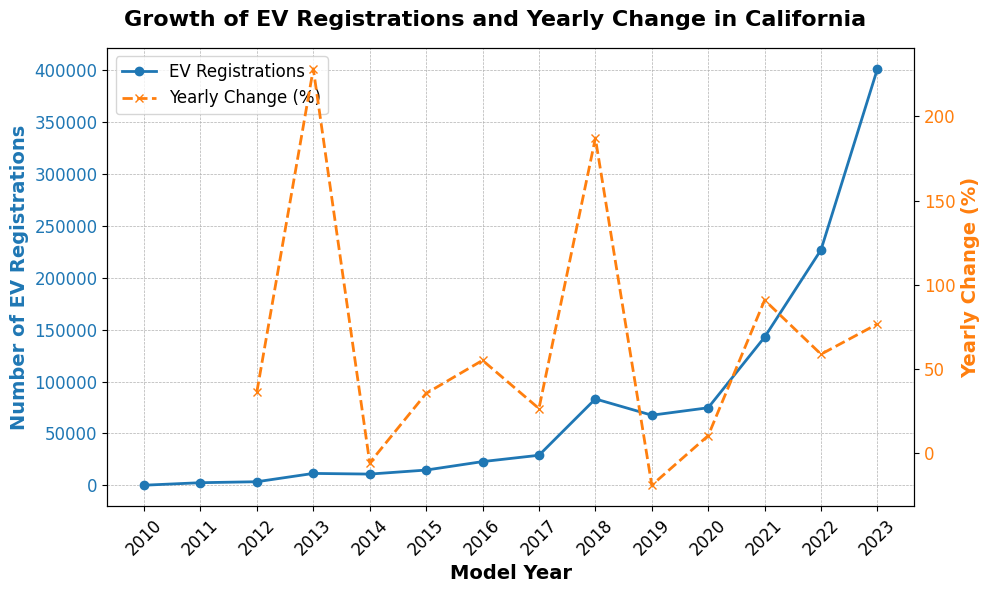

In [18]:
# Calculate the sum of vehicles by model year and yearly percentage changes
ev_growth = ev_cali.groupby('model_year')['vehicles'].sum().reset_index()
ev_growth['Yearly Change'] = ev_growth['vehicles'].pct_change() * 100  # Percentage change for CAGR
ev_growth = ev_growth[ev_growth['model_year'] != 2024]  # Exclude incomplete data for 2024
ev_growth.loc[ev_growth['model_year'] == 2011, 'Yearly Change'] = np.nan  # Set first year's change to NaN

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot EV registrations (primary y-axis)
color_ev = '#1f77b4'  # Blue color for EV Registrations
ax1.plot(ev_growth['model_year'], ev_growth['vehicles'], color=color_ev, marker='o', label='EV Registrations', linewidth=2)
ax1.set_xlabel('Model Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of EV Registrations', fontsize=14, fontweight='bold', color=color_ev)
ax1.tick_params(axis='y', labelcolor=color_ev, labelsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)
ax1.set_xticks(ev_growth['model_year'])
ax1.grid(True, which='major', linestyle='--', linewidth=0.5)

# Create a secondary y-axis for Yearly Change (CAGR)
color_cagr = '#ff7f0e'
ax2 = ax1.twinx()
ax2.plot(ev_growth['model_year'], ev_growth['Yearly Change'], color=color_cagr, linestyle='--', marker='x', label='Yearly Change (%)', linewidth=2)
ax2.set_ylabel('Yearly Change (%)', fontsize=14, fontweight='bold', color=color_cagr)
ax2.tick_params(axis='y', labelcolor=color_cagr, labelsize=12)

# Consolidate legends
lns1 = ax1.get_lines()[0]
lns2 = ax2.get_lines()[0]
lns = [lns1, lns2]
ax1.legend(handles=lns, loc='upper left', fontsize=12)

fig.suptitle('Growth of EV Registrations and Yearly Change in California', fontsize=16, fontweight='bold')

plt.grid(False)
plt.tight_layout()
plt.show()

The graph illustrates the growth of electric vehicle (EV) registrations and the year-to-year Compound Annual Growth Rate (CAGR) in California from 2010 to 2023. EV registrations, represented by the blue line, show a significant upward trend, especially after 2020, indicating an accelerating adoption of EVs. The dashed line shows the yearly CAGR, which fluctuates dramatically over the years, peaking in 2013 and 2023, with values exceeding 200%. Despite the volatility in year-to-year growth rates, the overall trend reflects an exponential increase in EV registrations, particularly in the most recent years, signaling robust market expansion in California's EV sector.

As we can see, CAGR is not exactly increasing over time and there is a lot of volatility. So this sector may not see an exponential growth over time. But the registrations are increasing, so there is still a healthy growth.

<b> Now lets explore the CAGR for new charging stations opened per year <b>

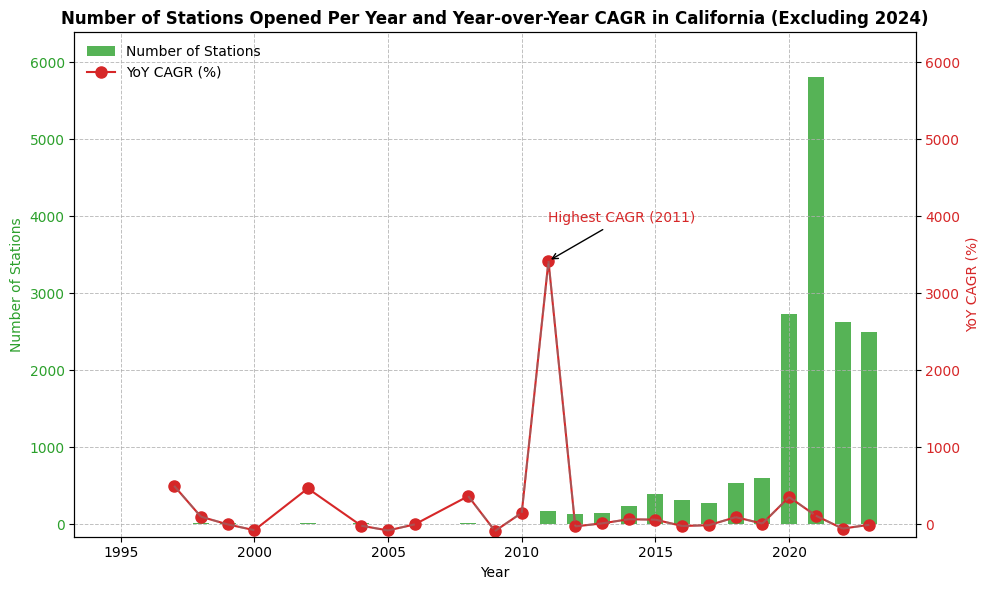

In [19]:
cali = cali_ev_chargers.copy()

# Group by year to get the number of stations opened per year
cali['year'] = cali['open_date'].dt.year
stations_per_year = cali.groupby('year').size()

# Remove the year 2024
stations_per_year = stations_per_year[stations_per_year.index != 2024]

# Calculate CAGR
cagr_per_year = []
years = stations_per_year.index

for i in range(1, len(years)):
    start_value = stations_per_year.iloc[i - 1]
    end_value = stations_per_year.iloc[i]
    cagr = ((end_value / start_value) ** (1 / 1)) - 1
    cagr_per_year.append(cagr * 100)

# Create a DataFrame for plotting YoY CAGR
cagr_years = years[1:]
cagr_df = pd.DataFrame({'Year': cagr_years, 'CAGR (%)': cagr_per_year})

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Modern color scheme
bar_color = '#2ca02c'
line_color = '#d62728'

# Bar chart
ax1.bar(stations_per_year.index, stations_per_year.values, color=bar_color, alpha=0.8, width=0.6, label='Number of Stations')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Stations', color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)
ax1.tick_params(axis='x')
ax1.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.8)

# Line plot for YoY CAGR
ax2 = ax1.twinx()
ax2.plot(cagr_df['Year'], cagr_df['CAGR (%)'], color=line_color, marker='o', markersize=8, linestyle='-', label='YoY CAGR (%)')
ax2.set_ylabel('YoY CAGR (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.grid(False)

# Aligning the zero line for both y-axes
station_max = max(stations_per_year) * 1.1
station_min = 0

# Calculate the scaling factor to align the zeros
cagr_max = max(cagr_df['CAGR (%)']) * 1.1
cagr_min = min(cagr_df['CAGR (%)']) * 1.1
scaling_factor = station_max / cagr_max

# Set the y-limit for the left axis (stations)
ax1.set_ylim(cagr_min * scaling_factor, station_max)
ax2.set_ylim(cagr_min * scaling_factor, cagr_max * scaling_factor)

# Adding dotted lines to highlight the relationship between station counts of consecutive years
for i, (year, cagr_value) in enumerate(zip(cagr_df['Year'], cagr_df['CAGR (%)'])):
    prev_year = year - 1
    if prev_year in stations_per_year.index:
        ax2.plot([prev_year, year], [cagr_df.loc[cagr_df['Year'] == prev_year, 'CAGR (%)'].values[0], cagr_value], color='gray', linestyle='--', alpha=0.5)

# Annotating the highest points
ax2.annotate('Highest CAGR (2011)', xy=(2011, cagr_df.loc[cagr_df['Year'] == 2011, 'CAGR (%)'].values[0]),
             xytext=(2011, cagr_df.loc[cagr_df['Year'] == 2011, 'CAGR (%)'].values[0] + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"), color=line_color)

plt.title('Number of Stations Opened Per Year and Year-over-Year CAGR in California (Excluding 2024)', fontweight='bold')

lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left', frameon=False)

fig.tight_layout()

# Show the plot
plt.show()


The green bars represents the number of stations, while the red line depicts the yearly CAGR. The number of stations remained relatively low and stable until 2020, after which a significant surge in the number of new stations is observed, particularly around 2020-2021, reaching over 5000 stations in a year. The CAGR shows large fluctuations, with a massive spike in 2011 and another sharp increase around 2021, where CAGR soared above 3000%, reflecting a rapid acceleration in the installation of charging infrastructure in response to growing EV demand. The trend suggests a significant recent effort to build out the charging network, although growth in CAGR has slightly stabilized after the 2021 peak.

There is a lot of volatility in both these plots. It indicates a somewhat uncertain market which became somewhat steady in the 2020's.

## Section 2: Opportunities in this sector

Here we will generate visualizations which indicate business opportunities in the current charging market.

We define load as the number of vehicles per charging stations per year. This is the distribution of the load across the years, and it indicates the overall average burden on an EV charger. The year 2024 has been removed from the dataset because the year has not finished yet and it was affecting the trendline.

In [20]:

cali_ev_chargers['public_non_public']=cali_ev_chargers['groups_with_access_code'].apply(lambda x: 'Public' if 'public' in str(x).lower() else 'Non Public')
cali = cali_ev_chargers.copy()

cali['open_year'] = cali['open_date'].dt.year
cali = cali[cali['open_year'] != 2024]
cali['stations'] = [1] * cali.shape[0]
stations_each_year = cali.groupby(['open_year'])[['stations']].sum().reset_index()
stations_each_year['stations_cum_sum'] = stations_each_year['stations'].cumsum()
stations_each_year = stations_each_year[['stations_cum_sum', 'open_year']]
evs_each_year = ev_cali.groupby('model_year')[['vehicles']].sum().reset_index()
evs_each_year['vehicles_cum_sum'] = evs_each_year['vehicles'].cumsum()
evs_each_year = evs_each_year[['model_year', 'vehicles_cum_sum']]
load_each_year = pd.merge(stations_each_year, evs_each_year, left_on = 'open_year', right_on='model_year').drop(columns = ['model_year']).set_index('open_year')
load_each_year['load'] = round(load_each_year['vehicles_cum_sum'] / load_each_year['stations_cum_sum'],2)
df = load_each_year.reset_index()

# Prepare the data using ColumnDataSource for hover tool compatibility
source = ColumnDataSource(data=dict(
    open_year=df["open_year"],
    load=df["load"]
))

# Create the figure for the line graph
p = figure(title="Year over Year Vehicles per Charging Stations", x_axis_label="Year", y_axis_label="Load",  y_range=(0, 120))

# Add data points (circles) to the plot
p.circle('open_year', 'load', size=10, fill_color="blue", line_color="black", source=source)

# Add the connected line (between the points)
p.line('open_year', 'load', line_width=2, source=source, color="blue")

# Add trend line (linear regression)
z = np.polyfit(df["open_year"], df["load"], 7)
p_trend = np.poly1d(z)
x_trend = np.linspace(min(df["open_year"]), max(df["open_year"]), 100)
y_trend = p_trend(x_trend)
p.line(x_trend, y_trend, color="gray", line_dash="dashed", legend_label="Trend Line", line_width=2)

# Add hover tool to display year and load
hover = HoverTool(tooltips=[
    ("Year", "@open_year"),
    ("Load", "@load")
])
p.add_tools(hover)

# Customizing
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.title.text_font_size = '15pt'
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"


cali_ev_chargers['public_non_public']=cali_ev_chargers['groups_with_access_code'].apply(lambda x: 'Public' if 'public' in str(x).lower() else 'Non Public')
cali = cali_ev_chargers.copy()
public_cali = cali[cali['public_non_public'] == 'Public']
public_cali['open_year'] = public_cali['open_date'].dt.year
public_cali = public_cali[public_cali['open_year'] != 2024]
public_cali['stations'] = [1] * public_cali.shape[0]
stations_each_year = public_cali.groupby(['open_year'])[['stations']].sum().reset_index()
stations_each_year['stations_cum_sum'] = stations_each_year['stations'].cumsum()
stations_each_year = stations_each_year[['stations_cum_sum', 'open_year']]
evs_each_year = ev_cali.groupby('model_year')[['vehicles']].sum().reset_index()
evs_each_year['vehicles_cum_sum'] = evs_each_year['vehicles'].cumsum()
evs_each_year = evs_each_year[['model_year', 'vehicles_cum_sum']]
load_each_year = pd.merge(stations_each_year, evs_each_year, left_on = 'open_year', right_on='model_year').drop(columns = ['model_year']).set_index('open_year')
load_each_year['load'] = round(load_each_year['vehicles_cum_sum'] / load_each_year['stations_cum_sum'],2)
df = load_each_year.reset_index()


# Prepare the data using ColumnDataSource for hover tool compatibility
source = ColumnDataSource(data=dict(
    open_year=df["open_year"],
    load=df["load"]
))

# Create the figure for the line graph
p1 = figure(title="Year over Year Vehicles per Charging Stations (Public)", x_axis_label="Year", y_axis_label="Load", y_range=(0, 120))

# Add data points (circles) to the plot
p1.circle('open_year', 'load', size=10, fill_color="orange", line_color="black", source=source)

# Add the connected line (between the points)
p1.line('open_year', 'load', line_width=2, source=source, color="orange")

# Add trend line (linear regression)
z = np.polyfit(df["open_year"], df["load"], 7)
p_trend = np.poly1d(z)
x_trend = np.linspace(min(df["open_year"]), max(df["open_year"]), 100)
y_trend = p_trend(x_trend)
p1.line(x_trend, y_trend, color="black", line_dash="dashed", legend_label="Trend Line", line_width=2)

# Add hover tool to display year and load
hover = HoverTool(tooltips=[
    ("Year", "@open_year"),
    ("Load", "@load")
])
p1.add_tools(hover)

# Customizing the plot
p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
p1.title.text_font_size = '15pt'
p1.xaxis.axis_label_text_font_size = "12pt"
p1.yaxis.axis_label_text_font_size = "12pt"
annotation = Label(x=2019, y=100.470, text="Highest Point", text_font_size="12pt", text_color="red", x_offset=5, y_offset=5)
p1.add_layout(annotation)

annotation = Label(x=2019, y=84.35, text="Highest Point", text_font_size="12pt", text_color="red", x_offset=5, y_offset=5)
p.add_layout(annotation)

# Show the plot
show(row(p, p1))

<ipython-input-20-86e4c4035318>:27: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

<ipython-input-20-86e4c4035318>:81: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



We can see that the overall burden on an average charger has increased over time, because of the increased EV demand. Since most of the chargers are public, it does not make a difference which chart we consider for our analysis. The load reached around 60 in 2019 and has been volatile but relatively steady at that value year-on-year. We are now noticing an upward pattern for the load on the EV chargers, indicating a higher adoption for EVs and slower increase in EV charging stations.

<b> Lets dive down to understand the heatmap of Vehicles per Charging Station plotted as per zip codes. Red dots represent very high number of vehicles per charging stations, which represents the distribution of business opportunity for us <b>

In [21]:
#Grouping by Zip Code
cali_veh_stations = cali_pop_veh_stations.groupby('zip')[['station_name', 'vehicles']].agg({'station_name' : 'sum', 'vehicles': 'sum'}).reset_index()

#Adding latitude and longitude data
cali_veh_stations = cali_veh_stations.merge(zip_codes, left_on='zip', right_on='zip', how='inner')

#Creating the vehicles per station column
cali_veh_stations['vehicles_per_station'] = round(cali_veh_stations['vehicles'] / cali_veh_stations['station_name'],2)

#Graphing the geospatial heatmap
cali_veh_stations['Categorization'] = pd.qcut(cali_veh_stations['vehicles_per_station'], q = 4, labels = ['Very Low', 'Low', 'High', 'Very High'])

# Creating different dataframes for the categories
very_low_df = cali_veh_stations[cali_veh_stations['Categorization'] == 'Very Low']
low_df = cali_veh_stations[cali_veh_stations['Categorization'] == 'Low']
high_df = cali_veh_stations[cali_veh_stations['Categorization'] == 'High']
very_high_df = cali_veh_stations[cali_veh_stations['Categorization'] == 'Very High']
#Adding a scatter mapbox
fig = px.scatter_mapbox(
    very_high_df,
    lat='latitude',
    lon='longitude',
    opacity=0.5,
    color_discrete_sequence=[px.colors.sequential.Reds[7]],
    mapbox_style='open-street-map',
    center={'lat': 37.75, 'lon': -122.4},
    zoom=5
)
fig.data[0].name = 'Very High Vehicles Per Station'
fig.data[0].showlegend = True

#Adding trace for other scatterplots
fig.add_trace(
    go.Scattermapbox(
        lat=high_df['latitude'],
        lon=high_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='orange'),
        name='High Vehicles Per Station',
        showlegend=True
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=low_df['latitude'],
        lon=low_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='yellow'),
        name='Low Vehicles Per Station',
        showlegend=True
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=very_low_df['latitude'],
        lon=very_low_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='green'),
        name='Very Low Vehicles Per Station',
        showlegend=True
    )
)

#Updating the layout
fig.update_layout(
    title={
        'text': 'Geospatial Analysis of Vehicles per Charging Stations by Zip Code',
        'font': {'size': 18, 'family': 'Arial', 'color': 'black'},
        'x': 0.5,
        'y': 0.95
    },
    mapbox_zoom=4.6,
    mapbox_style='open-street-map',
    margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()

We will filter for only public chargers and check this chart again.

In [22]:
# Preparing the data
cali_ev_chargers['public_non_public']=cali_ev_chargers['groups_with_access_code'].apply(lambda x: 'Public' if 'public' in str(x).lower() else 'Non Public')
cali = cali_ev_chargers.copy()
public_cali = cali[cali['public_non_public'] == 'Public']
public_cali_grouped = public_cali.groupby('zip')[['latitude', 'longitude', 'station_name']].agg({'latitude' : 'mean', 'longitude' : 'mean', 'station_name' : 'count'}).reset_index()
ev_cali_grouped = ev_cali.groupby('zip')[['vehicles']].sum()
cali_public = pd.merge(ev_cali_grouped, public_cali_grouped, on = 'zip')
cali_public['vehicles_per_station'] = round(cali_public['vehicles'] / cali_public['station_name'],2)
cali_public['Categorization_Public'] = pd.qcut(cali_public['vehicles_per_station'], q = 4, labels = ['Very Low', 'Low', 'High', 'Very High'])
very_low_df = cali_public[cali_public['Categorization_Public'] == 'Very Low']
low_df = cali_public[cali_public['Categorization_Public'] == 'Low']
high_df = cali_public[cali_public['Categorization_Public'] == 'High']
very_high_df = cali_public[cali_public['Categorization_Public'] == 'Very High']
#Adding a scatter mapbox
fig = px.scatter_mapbox(
    very_high_df,
    lat='latitude',
    lon='longitude',
    opacity=0.5,
    color_discrete_sequence=[px.colors.sequential.Reds[7]],
    mapbox_style='open-street-map',
    center={'lat': 37.75, 'lon': -122.4},
    zoom=5
)
fig.data[0].name = 'Very High Vehicles Per Station'
fig.data[0].showlegend = True

#Adding trace for other scatterplots
fig.add_trace(
    go.Scattermapbox(
        lat=high_df['latitude'],
        lon=high_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='orange'),
        name='High Vehicles Per Station',
        showlegend=True
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=low_df['latitude'],
        lon=low_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='yellow'),
        name='Low Vehicles Per Station',
        showlegend=True
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=very_low_df['latitude'],
        lon=very_low_df['longitude'],
        mode='markers',
        opacity=0.4,
        marker=dict(color='green'),
        name='Very Low Vehicles Per Station',
        showlegend=True
    )
)

#Updating the layout
fig.update_layout(
    title={
        'text': 'Geospatial Analysis of Vehicles per Public Charging Stations by Zip Code',
        'font': {'size': 18, 'family': 'Arial', 'color': 'black'},
        'x': 0.5,
        'y': 0.95
    },
    mapbox_zoom=4.6,
    mapbox_style='open-street-map',
    margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()


We have used quantiles (4) to categorize the load on the charging station as the standard deviation is two times of the mean, incidating a highly skewed distribution.


We can see that there isn't a significant difference between the two plots. The distribution indicates a significant opportunity for expanding EV charging infrastructure. Red dots, marking zip codes with a very high number of vehicles per charging station, are densely concentrated in major urban centers like San Francisco, San Jose, and Los Angeles, pointing to a substantial mismatch between EV demand and available charging facilities. These zip codes should be prioritized for new installations to meet the growing demand. In contrast, green dots indicate areas where the current infrastructure may be adequate, suggesting that expansion efforts could be more strategically directed towards the under-served, red-marked urban areas to optimize resource allocation and investment.

<b> To understand the trend more, we plot Public chargers vs Population Density.</b> <br>
 This is a scatter plot and here, points with high population density and low number of public chargers are a potential business opportunity.

In [23]:
#divide the public and non pulic stations
cali_ev_chargers['public_or_non_public'] = cali_ev_chargers['groups_with_access_code'].apply(lambda x : 'public' if 'public' in str(x).lower() else 'private')
charger_pub_pri = cali_ev_chargers.groupby(['zip', 'public_or_non_public'])['station_name'].count().unstack(fill_value=0).reset_index()

#add columns about  population and squarea of miles for every zip
charger_pub_pri = charger_pub_pri.merge(cali_pop[['zip', 'population']], on='zip', how='right').fillna(0)
charger_pub_pri = charger_pub_pri.merge(zip_area, on = 'zip', how = 'inner')

#calculate the population density
charger_pub_pri['population_density'] = charger_pub_pri['population'] / charger_pub_pri['sqMile']

output_notebook()

# create source for public stations
source_public = ColumnDataSource(data=dict(
    population_density=charger_pub_pri['population_density'],
    chargers=charger_pub_pri['public'],
    zip_code=charger_pub_pri['zip'],
))

# create source for private stations
source_private = ColumnDataSource(data=dict(
    population_density=charger_pub_pri['population_density'],
    chargers=charger_pub_pri['private'],
    zip_code=charger_pub_pri['zip'],))

# public figure
p1 = figure(
    width=1_000, height=600,
    title='Public Chargers vs Population Density',
    x_axis_label='Population Density (people per square mile)',
    y_axis_label='Number of Public Chargers')

p1.scatter(
    'population_density', 'chargers', source=source_public, fill_color='yellow',
    alpha=0.3, legend_label='Public Chargers',size = 12)

p1.title.align = 'center'
p1.title.text_font_size = '20px'

# add tools
hover_public = HoverTool(tooltips=[
    ("Zip Code", "@zip_code"),
    ("Public Chargers", "@chargers"),
    ("Population Density", "@population_density{2f}"),])

# Adding hover tool
p1.add_tools(hover_public)

# add slider
x_max = charger_pub_pri['population_density'].max()
p1_slider = RangeSlider(start=0, end=x_max, value=(0, x_max), step=100, title="Adjust Population Density Range")
p1_slider.js_link('value', p1.x_range, 'end', attr_selector = 0)
p1_slider.js_link('value', p1.x_range, 'end', attr_selector = 1)

show(layout(column(p1, p1_slider)))

The plot shows the relationship between public chargers and population density (people per square mile). Most data points cluster in areas with lower population densities and fewer public chargers, while areas with higher population densities which have a small number of public chargers, indicate potential gaps in EV infrastructure. The plot highlights that zip codes with high population density but relatively few public chargers present significant business opportunities for expanding the EV charging network, as these areas may face rising demand with insufficient infrastructure to support it.

To filter for precise zip codes, we define high population density to be that which is greater than their median plus one standard deviation. We further define low number of public chargers to be equal to half of their median. This is because the standard deviation is five times the median, so we had to devise a different estimate for it.

In [24]:
# top ten cities with high pop density and low number of public chargers

high_pop_zips = charger_pub_pri['population_density'].median() + charger_pub_pri['population_density'].std()
low_public_charger_zips = charger_pub_pri['public'].median() * 0.5  # mean is twice of median and std is five times the median. So half of median is used for insights
promising_df = charger_pub_pri[(charger_pub_pri['population_density'] > high_pop_zips) & (charger_pub_pri['public'] < low_public_charger_zips)]
promising_df.sort_values(by = 'population_density', ascending = False, inplace = True)
promising_df.head()

df_city_zip = cali_ev_chargers[['city', 'zip']].copy().drop_duplicates()

promising_df = promising_df.merge(df_city_zip, left_on = 'zip', right_on = 'zip', how = 'inner')

promising_list = list(zip(promising_df['city'].iloc[:10], promising_df['zip'].iloc[:10]))

print('The top ten cities and zip codes which lack sufficient infrastucture are: {}'.format(promising_list))

The top ten cities and zip codes which lack sufficient infrastucture are: [('Berkeley', 94709), ('Maywood', 90270), ('Huntington Park', 90255), ('San Francisco', 94116), ('Los Angeles', 90001), ('San Francisco', 94134), ('Los Angeles', 90063), ('Arvin', 93202), ('San Diego', 92105), ('Garden Grove', 92843)]


Thus the top ten cities with zip codes which lack sufficient infrastucture are: ('Berkeley', 94709), ('Maywood', 90270), ('Huntington Park', 90255), ('San Francisco', 94116), ('Los Angeles', 90001), ('San Francisco', 94134), ('Los Angeles', 90063), ('Arvin', 93202), ('San Diego', 92105), ('Garden Grove', 92843)

To analyse our opportunity from a different perspective, we analysed the top ten cities of California as per population. This was done because they represent the biggest market for EVs, given the year 2035 target for banning ICE vehicle sales. So we plotted cities vs EVs per capita for these ten cities.

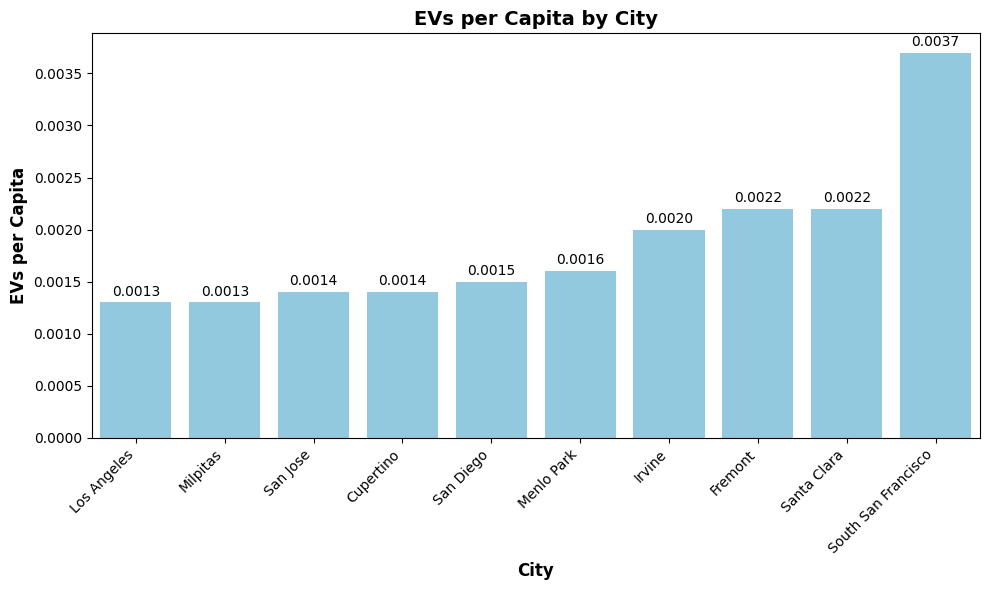

In [25]:
# Filter Light Duty EVs
light_evs = ev_cali[ev_cali['duty'] == 'Light']

# Merge data on ZIP codes for population and chargers
population_zip = light_evs.merge(cali_pop, on='zip', how='inner').reset_index()
cities_population = population_zip.merge(cali_ev_chargers, on='zip').reset_index()[['zip', 'city', 'population', 'vehicles']]

# Group by city and calculate the top 10 cities by population
top_10_cities = (cities_population.groupby('city')[['population', 'vehicles']].sum().sort_values(by='population', ascending=False).reset_index().iloc[:10])

# Calculate EVs per capita
top_10_cities['EVs per Capita'] = round(top_10_cities['vehicles'] / top_10_cities['population'], 4)

# Sort cities by EVs per Capita
top_10_cities = top_10_cities.sort_values(by='EVs per Capita', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='city', y='EVs per Capita', data=top_10_cities, color='skyblue')

# Add value labels above each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.4f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Vertical offset for the label
                      textcoords='offset points')

# Set the title and labels
plt.title('EVs per Capita by City', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('EVs per Capita', fontsize=12, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## Section 3: Forecasting future EV registrations and charging stations

<b> Let's see the forecast for EV registrations for the three years after 2023, i.e., 2024, 2025, and 2026. </b>

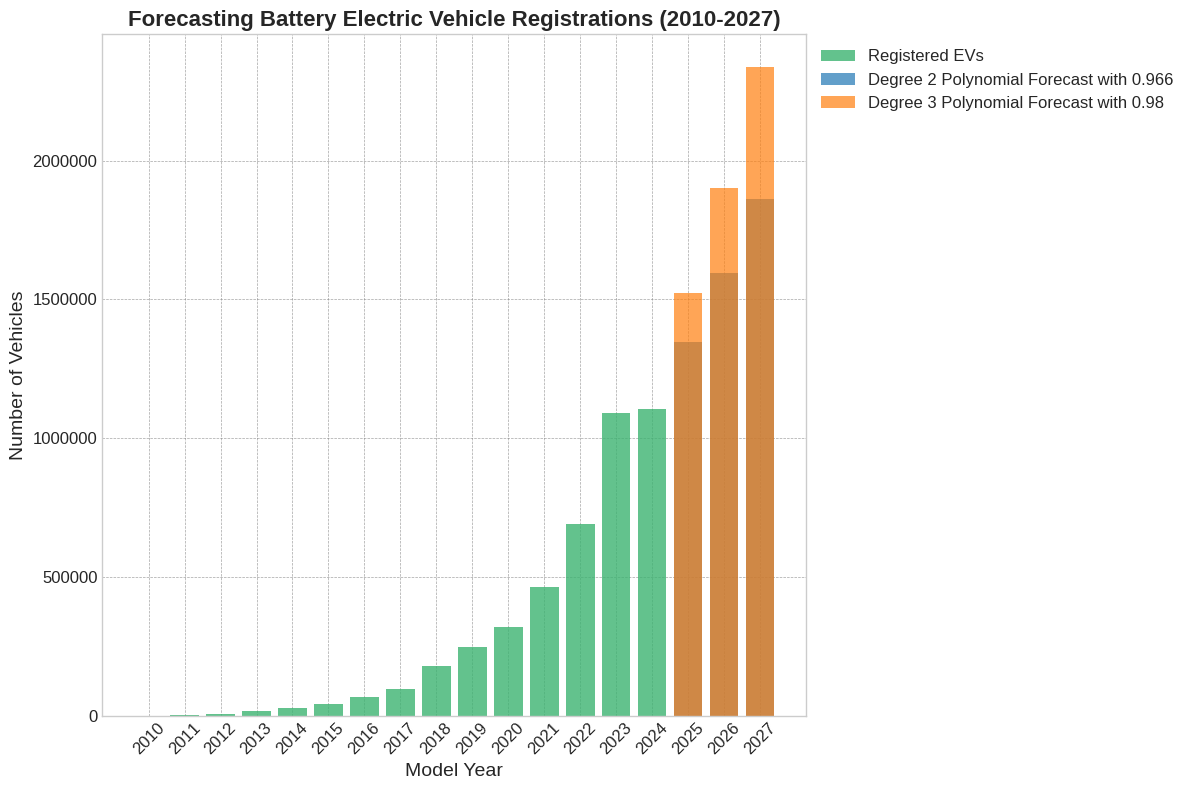

In [38]:
# Prepare yearly data
ev_yearly_cali = ev_cali.groupby('model_year')[['vehicles']].sum().reset_index().sort_values(by='model_year', ascending=True)
ev_yearly_cali['vehicles registered'] = ev_yearly_cali['vehicles'].cumsum()

# Prepare data for the model
x = ev_yearly_cali[['model_year']]
y = ev_yearly_cali['vehicles registered']

full_years = pd.DataFrame({'model_year': np.arange(2010, 2028)})

plt.figure(figsize=(12, 8))

plt.style.use('seaborn-whitegrid')

# Plotting bar graph
plt.bar(ev_yearly_cali['model_year'], ev_yearly_cali['vehicles registered'], color='mediumseagreen', label='Registered EVs', alpha=0.8)

# List of degrees to compare
degrees = [2, 3]

last_actual_year = ev_yearly_cali['model_year'].max()

# Loop through different polynomial degrees to compare
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)

    X_poly = poly_features.fit_transform(x)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    full_years_poly = poly_features.transform(full_years)

    full_predicted_vehicles_poly = poly_model.predict(full_years_poly)

    y_pred = poly_model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    forecast_years = full_years[full_years['model_year'] > last_actual_year]
    forecast_values = full_predicted_vehicles_poly[full_years['model_year'] > last_actual_year]

    plt.bar(forecast_years['model_year'], forecast_values, alpha=0.7, label=f'Degree {degree} Polynomial Forecast with {round(r2,3)}', width=0.8)

# Updating the plot
plt.title('Forecasting Battery Electric Vehicle Registrations (2010-2027)', fontsize=16, fontweight='bold')
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(ticks=np.arange(min(full_years['model_year']), max(full_years['model_year']) + 1, 1), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

# Show the plot
plt.show()


The green bars represent historical EV registrations, showing exponential growth starting around 2020, while the red bars forecast rapid growth in EV registrations through 2027. Both forecasts have similar R-squared values but they divulge by 2027 because of the degree. This exponential growth underscores the increasing demand for EVs and the critical need for expanding the EV charging infrastructure to accommodate this future rise in registrations.

Now, we will see the forecast for new charging stations opened year-on-year as well as the total charging stations in California year-on-year. This is until 2035 because of the ICE sale ban mandate of the Government of California which will be enforced from 2035.

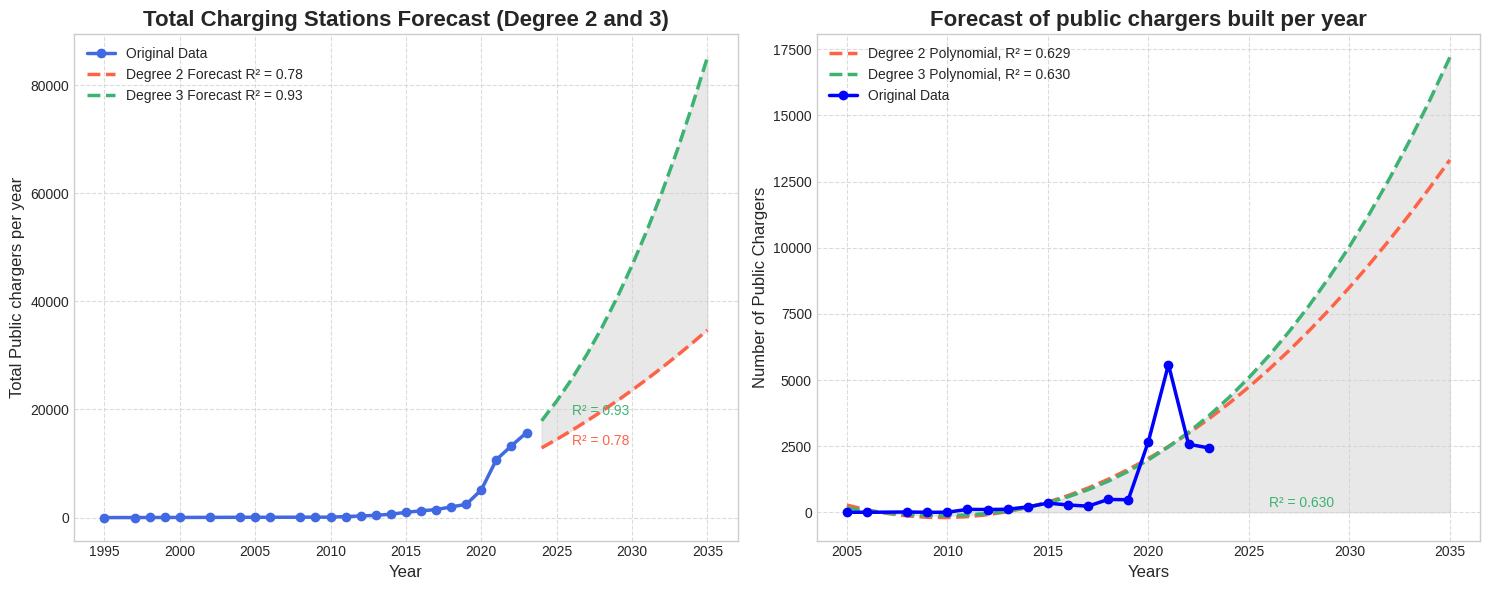

In [27]:
# Forecast for cumsum i.e. the total public charging stations per year
ev_chargers_forecast = cali_ev_chargers[cali_ev_chargers.loc[:, 'groups_with_access_code'].str.contains('Public', regex=False)]
ev_chargers_forecast['year'] = ev_chargers_forecast['open_date'].dt.year
chargers_per_year = ev_chargers_forecast.groupby('year').size()
chargers_per_year.index = pd.to_numeric(chargers_per_year.index)
chargers_per_year = pd.DataFrame(chargers_per_year).iloc[:-1]
chargers_per_year.columns = ['num_of_chargers']
chargers_per_year['cumsum'] = chargers_per_year['num_of_chargers'].cumsum()

x = np.array(chargers_per_year.index).reshape(-1, 1)
y = chargers_per_year['cumsum'].values

# Polynomial regression for degree 2 and 3
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)
x_poly_2 = poly_2.fit_transform(x)
x_poly_3 = poly_3.fit_transform(x)

# Fit the models
model_2 = LinearRegression().fit(x_poly_2, y)
model_3 = LinearRegression().fit(x_poly_3, y)

# Calculate R² for both models
r2_degree_2 = model_2.score(x_poly_2, y)
r2_degree_3 = model_3.score(x_poly_3, y)

years_future = np.arange(2024, 2036).reshape(-1, 1)
years_future_poly_2 = poly_2.transform(years_future)
years_future_poly_3 = poly_3.transform(years_future)

# Make predictions for both degree 2 and degree 3
y_future_pred_2 = model_2.predict(years_future_poly_2)
y_future_pred_3 = model_3.predict(years_future_poly_3)

plt.figure(figsize=(15, 6))

# Total Charging Stations Forecast (Degree 2 and 3)
plt.subplot(1, 2, 1)
plt.plot(chargers_per_year.index, chargers_per_year['cumsum'], label='Original Data', color='royalblue', linewidth=2.5, marker='o', markersize=6)
plt.plot(np.arange(2024, 2036), y_future_pred_2, label=f'Degree 2 Forecast R² = {r2_degree_2:.2f}', color='tomato', linestyle='--', linewidth=2.5)
plt.plot(np.arange(2024, 2036), y_future_pred_3, label=f'Degree 3 Forecast R² = {r2_degree_3:.2f}', color='mediumseagreen', linestyle='--', linewidth=2.5)

# Add a shaded region behind the forecast
plt.fill_between(np.arange(2024, 2036), y_future_pred_2, y_future_pred_3, color='lightgray', alpha=0.5)

# Add grid, improve axis labels and title
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Public chargers per year', fontsize=12)
plt.title('Total Charging Stations Forecast (Degree 2 and 3)', fontsize=16, weight='bold')
plt.legend(fontsize=10)

# Add annotation for R² values
plt.text(2026, y_future_pred_2[0] + 500, f"R² = {r2_degree_2:.2f}", color='tomato', fontsize=10)
plt.text(2026, y_future_pred_3[0] + 1000, f"R² = {r2_degree_3:.2f}", color='mediumseagreen', fontsize=10)

# Forcasting no. of chargers to be opened
ev_chargers_forecast = cali_ev_chargers[cali_ev_chargers.loc[:, 'groups_with_access_code'].str.contains('Public', regex=False)]
ev_chargers_forecast['year'] = ev_chargers_forecast['open_date'].dt.year
chargers_per_year = ev_chargers_forecast.groupby('year').size()
chargers_per_year.index = pd.to_numeric(chargers_per_year.index)
chargers_per_year = pd.DataFrame(chargers_per_year).iloc[:-1]
chargers_per_year.columns = ['num_of_chargers']

# Only years after start_year will be considered
start_year = 2005
chargers_per_year = chargers_per_year.loc[start_year:]

years_1 = np.array(list(chargers_per_year.index)).reshape(-1, 1)
values_1 = np.array(list(chargers_per_year['num_of_chargers']))

future_years = np.array(range(start_year, 2036)).reshape(-1, 1)

# Perform polynomial regression for degree 2 and degree 3
degrees = [2, 3]
colors = ['tomato', 'mediumseagreen']
polynomial_models = {}

plt.subplot(1, 2, 2)
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(years_1)

    model = LinearRegression()
    model.fit(X_poly, values_1)

    future_X_poly = poly.transform(future_years)
    future_predictions = model.predict(future_X_poly)

    r2 = model.score(X_poly, values_1)

    plt.plot(future_years, future_predictions, linestyle='--', color=colors[i], linewidth=2.5, label=f'Degree {degree} Polynomial, R² = {r2:.3f}')

plt.plot(years_1, values_1, linestyle='-', color='blue', marker='o', markersize=6, label='Original Data', linewidth=2.5)

plt.fill_between(future_years.flatten(), future_predictions, color='lightgray', alpha=0.5)

# Customizing plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Forecast of public chargers built per year", fontsize=16, weight='bold')
plt.xlabel("Years", fontsize=12)
plt.ylabel("Number of Public Chargers", fontsize=12)
plt.legend(fontsize=10)

# Add annotation for R² values
plt.text(2026, future_predictions[0] + 50, f"R² = {r2:.3f}", color=colors[i], fontsize=10)

# Displaying plot
plt.tight_layout()
plt.show()


For number of chargers opened per year, the R² values are not well fitting. As this is a more volatile dataset, We can see how a 0.001 variation in R² creates a different forecast because of the large timeline. It reaffirms the uncertainty in the market and it would probably be wiser to not establish too many new stations and focus on profitability rather than scale.

Lastly, we check the forecast for the total number of charging stations in California. We used the cumulative summation approach for this.

The three degree R² is quite compatible and suggests a rapid exponential growth. The two degree R² is more subdued and does not fit the graph as well. At the very least, this indicates that the market is nowhere near saturation and there is enough growth potential to enter this sector.

The original data, shown by the blue line, indicates a steady increase in charging stations, with rapid growth starting around 2020. The degree 3 model predicts a much sharper rise in the number of charging stations through 2035, potentially surpassing 80,000 chargers per year, while the degree 2 model forecasts a more conservative growth. The higher R² value of the degree 3 model suggests it may better represent future trends, pointing to a need for significantly expanding charging infrastructure to meet the projected demand from the rising number of EVs.

## Challenges

1.	There were some missing values in the dataset for city and Zipcode for UC San Diego, data imputation was performed by manually fetching Zip code and City for UC San Diego. Zip code type correction was also performed for Zip code 92555.
2.	There were some invalid model year values which were replaced with NaN values.
3.	Zip code type was converted to an integer type while cleaning Population Dataset.
4.	We used USPS dataset to get location coordinates according to the zip code for California.


## Conclusions

In our project, we have analysed the gaps in the infrastructure EV charging stations across California along with the population per zip code and EV registrations in the state of California

Section 1: Exploratory Data Analysis

*   Non-public chargers are primarily clustered around major cities like Sacramento, Los Angeles, San Jose, Tijuana while public chargers are also clustered around Sacramento, Los Angeles, San Jose, Menlo Park, Santa Clarita, Burbank and Long Beach.
*   Cities like Fairfield, Sacramento, Daly City have inoperable EV charger stations present opportunities to have more of Public Chargers which can be easily accessible for the public for EV charging.
*  Sacramento has many public chargers which are not operational which shows gaps in the already established Public EV infrastructure.

* There is unequal distribution of EV chargers in the cities of Fairfield, Santa Cruz, Fresno, Davis unequal distribution of EV chargers across different cities, these cities will require additional accessible and operable EV Charger Stations.
*   Tesla is driving the EV sales and this suggests there could be potential business opportunities for tie-ups with Tesla to provide for EV charging stations.
*   Compound Annual Growth Rate (2010-2023) of EV registrations show steady growth and there is lot of volatility and trends somewhat looks uncertain for EV Market but, despite the volatility in year-to-year growth rates, the overall trend reflects an exponential increase in EV registrations signaling robust market expansion in EV sector.


Section 2: EV Load analysis for Charging stations and Existing opportunities to tap into to improve EV infrastructure.


*   The annual load trend for all EV charging stations in California shows a relatively smaller load but the inclusion of private charging stations can help distribute the load.
*   Annual load trend of public charging stations the load peaked in 2019 and then decreased, there has been a noticeable upward trend in recent years. The number of electric vehicles grows, the load pressure on public charging stations still exists, especially if the construction of charging stations has not kept up with the growth of vehicles in a timely manner.


*   Geo-spatial analysis shows that the San Francisco Bay Area, Sacramento, and Los Angeles regions have high pressure on charging stations, while central and northern California have a more dispersed but adequate distribution. This highlights the need to prioritize expanding infrastructure in densely populated cities with high EV adoption.
*   There is undue pressure on charging stations in the Bay Area, Sacramento, and Los Angeles, while central and northern California have adequate charger distribution.


*   Cities like Berkeley, Huntington Park, and San Diego currently lack sufficient EV charging infrastructure, representing opportunities for targeted development.

*   Menlo Park, Santa Clara, and Irvine lead in per capita EV ownership, showing strong demand and acceptance for EV Charger while Anaheim and South San Francisco lag behind, indicating room for increased adoption.

Section 3: Forecast of EV Registrations, Future construction of EV Chargers


*   Holt-Winters model predict that EV registrations will exceed 120,000 by 2026, and quadratic and polynomial regression models predict that public charging stations will reach around 90,000 by 2035, putting the need for significant infrastructure expansion in the spotlight.
*   It's crucial to accelerate charging station expansion as focusing on high-load areas and targeted improvements based on station type and regional needs.


In a nutshell, our analysis reveals that EV infrastructure is unevenly distributed. Major urban cities face inapt supply of EVs and demand of available EV chargers. There are cities with existing infrastructure but it is not accessible to the public either because it is not operational to be used there is definitely a need for strategic expansion of EV chargers to further keep pace with the with future demands of rising EVs as they are expected to skyrocket even if the market looks a little volatile or uncertain right now.



## Future Steps

1. Our analysis recommends better assessment of charging station distribution needs for EV dependent population and balanced infrastructure expansion.
2. Recommendation to city planners that there is an urgent need to address and prioritize expanding charging stations in densely populated areas with High EV adoption.
3. State of California to ensure proper allocation of budget and resources to promote sustainable and robust development of EV ecosystem to create fertile grounds for EV businesses to thrive.  
4. Suggestion to local EV businesses to tie-up with Private EV charging facilities to ease inadequacies in EV charging infrastructure in high-load areas.

# References

# Citations

1. https://www.energy.ca.gov/news/2024-08/california-surpasses-150000-electric-vehicle-chargers. Last accessed 29th September 2024.
2. https://www.gov.ca.gov/2020/09/23/governor-newsom-announces-california-will-phase-out-gasoline-powered-cars-drastically-reduce-demand-for-fossil-fuel-in-californias-fight-against-climate-change/. Last accessed 29th September 2024.

# Sources of Dataset

1. https://www.california-demographics.com/zip_codes_by_population

2. https://catalog.data.gov/dataset/vehicle-fuel-type-count-by-zip-code

3. https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

4. https://www.unitedstateszipcodes.org/zip-code-database/

5. https://gis.data.ca.gov/datasets/dea966d601934f49b9a0e1668182801b_0/explore?location=36.773198%2C-119.005050%2C6.02&showTable=true

## Generative-AI Disclosure

While working on the project, we have utilized Generative AI tools like ChatGPT, Microsoft Copilot to assist with some of the aspects of the analysis conducted for this project. Below is the detailed account of how the Generative AI tools were used:

1. For improving aesthetics of graphs and charts: We used ChatGPT, Microsoft Copilot to get more suggestions on how to conduct beautification of charts, graphs, it suggested some changes in the python code to be implemented to make the charts, graph's colors, borders, and plots look better.

2. Code Review and Debugging: We took advise of Microsoft Copilot and ChatGPT to assess errors in the code, for debugging of issues and asked for suggestions on how to resolve those errors.

3. Research Assistance: ChatGPT was used to generate ideas on different types of charts that can be explored on for better presentation of data.

4. Insights Generation: We took suggestions of ChatGPT to get insights for some of the charts, and also took its advice enhancing quality of insights.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.

